#**VERZEO MACHINE LEARNING MAJOR PROJECT**

##**Importing Libraries**

In [5]:
#importing data analysis libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing scikit libraries
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

##**Importing Dataset**

In [6]:
df= pd.read_csv(r"digit_svm.csv")

In [7]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##**Checking and analyzing dataset information**

**Checking for null values**

In [8]:
df.isnull() .sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [9]:
df.describe

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

     

In [10]:
df.shape

(42000, 785)

## **Visualizing the columns of the dataset**

C:\Users\home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

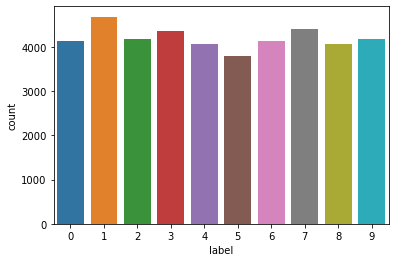

In [11]:
sns.countplot(df['label'])

Text(0.5, 1.0, 'Digit 1')

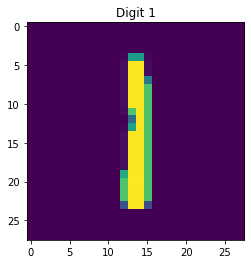

In [12]:
one = df.iloc[2, 1:]
one= one.values.reshape(28,28)
plt.imshow(one)
plt.title("Digit 1")

In [ ]:
nine = df.iloc[11, 1:]
nine = nine.values.reshape(28,28)
plt.imshow(nine)
plt.title("Digit 9")

## **Splitting the Data and performing Machine learning algorithms**

In [ ]:
x = df.drop("label", axis = 1)
y = df['label']

Scaling the features

In [ ]:
x_scaled = scale(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8,test_size = 0.2, random_state = 1)

In [ ]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

## **Support Vector Machine**

**Liner Model**

In [ ]:
linear_model=SVC(kernel='linear')
linear_model.fit(x_train,y_train)

In [ ]:
# predict
y_pred = linear_model.predict(x_test)

In [ ]:
# accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

In [ ]:
#precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

By using SVM non-linear model poly we are getting accuracy of 95%


SVM using RBF 

In [ ]:
# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

In [ ]:
# different class-wise accuracy - #precision, recall and f1-score
scores=metrics.classification_report(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(scores)

By using rbf we are getting accuracy of 97%

## **Visualising the training data set**

In [ ]:
data= np.random.randint(1,y_pred.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(data):
    plt.subplot(150+i+1)
    d = x_test[j].reshape(28,28)
    plt.title(f'Predicted Label: {y_pred[j]}')
    plt.imshow(d)
plt.show()

In [ ]:
x_test

**Scaling the features**

In [ ]:
test_scaled = scale( x_test)

In [ ]:
test_predict = model.predict(test_scaled)

In [ ]:
# Plotting the distribution of prediction
a = {'ImageId': np.arange(1,test_predict.shape[0]+1), 'Label': test_predict}
data_to_export = pd.DataFrame(a)
sns.countplot(data_to_export['Label'], palette = 'icefire')

In [ ]:
# Let us visualize few of predicted test numbers

data= np.random.randint(1,test_predict.shape[0]+1,5)

plt.figure(figsize=(16,4))
for i,j in enumerate(data):
    plt.subplot(150+i+1)
    d = test_scaled[j].reshape(28,28)
    plt.title(f'Predicted Label: {test_predict[j]}')
    plt.imshow(d)
plt.show()

In [ ]:
# Exporting the predicted values 
data_to_export.to_csv(path_or_buf='submission.csv', index=True)